In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import scipy.io

## Import data

In [31]:
#ts_0306A = scipy.io.loadmat('/Users/yilewang/workspaces/data4project/lateralization/ts_fmri/fmri_AAL_16/AD-TS/0306A/ROISignals_0306A.mat') 
ts_0306A = pd.read_csv('/Users/yilewang/workspaces/data4project/lateralization/LFP_critical/AD/0306A_0.015.csv')

In [32]:
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
#pd_ts_0306A = pd.DataFrame(ts_0306A['ROISignals'].T,index=regions)
pd_ts_0306A = pd.DataFrame(ts_0306A,columns=regions)
pd_ts_0306A.head()

,aCNG-L,aCNG-R,mCNG-L,mCNG-R,pCNG-L,pCNG-R,HIP-L,HIP-R,PHG-L,PHG-R,AMY-L,AMY-R,sTEMp-L,sTEMP-R,mTEMp-L,mTEMp-R
0,-0.838006,0.984739,-2.898758,1.267692,2.622866,-2.366330,-0.716939,-2.571273,-0.504778,0.286048,0.946531,3.180661,-1.641875,-0.240139,-2.745522,1.114270
1,-0.699953,1.158599,-2.515733,0.976826,2.581504,-2.252329,-0.798293,-2.416785,-0.676952,0.404086,1.051873,2.797757,-1.723159,-0.012101,-2.179955,0.929840
2,-0.569872,1.419863,-2.265103,0.650817,2.569450,-2.178724,-0.844423,-2.301591,-0.817289,0.513448,1.168186,2.482066,-1.765949,0.179197,-1.825085,0.757057
3,-0.420497,1.627972,-2.090203,0.289906,2.512698,-2.129200,-0.945115,-2.186496,-0.930224,0.699516,1.272656,2.183463,-1.823478,0.417842,-1.542546,0.541642
4,-0.338015,1.839152,-1.999535,0.029801,2.470273,-2.095031,-1.059178,-2.097993,-1.033928,0.877231,1.390647,1.894860,-1.845236,0.624964,-1.321945,0.399311


In [33]:
pd_ts_diff = pd_ts_0306A.diff(axis=0)
pd_ts_diff = pd_ts_diff.iloc[1:,:]
pd_ts_0306A_truc = pd_ts_0306A.iloc[1:,:]

In [34]:
roi = [4, 5]
X = pd_ts_diff.iloc[:,roi].values
# X = X.reshape(-1,1)
# Fit a model with 3 components
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

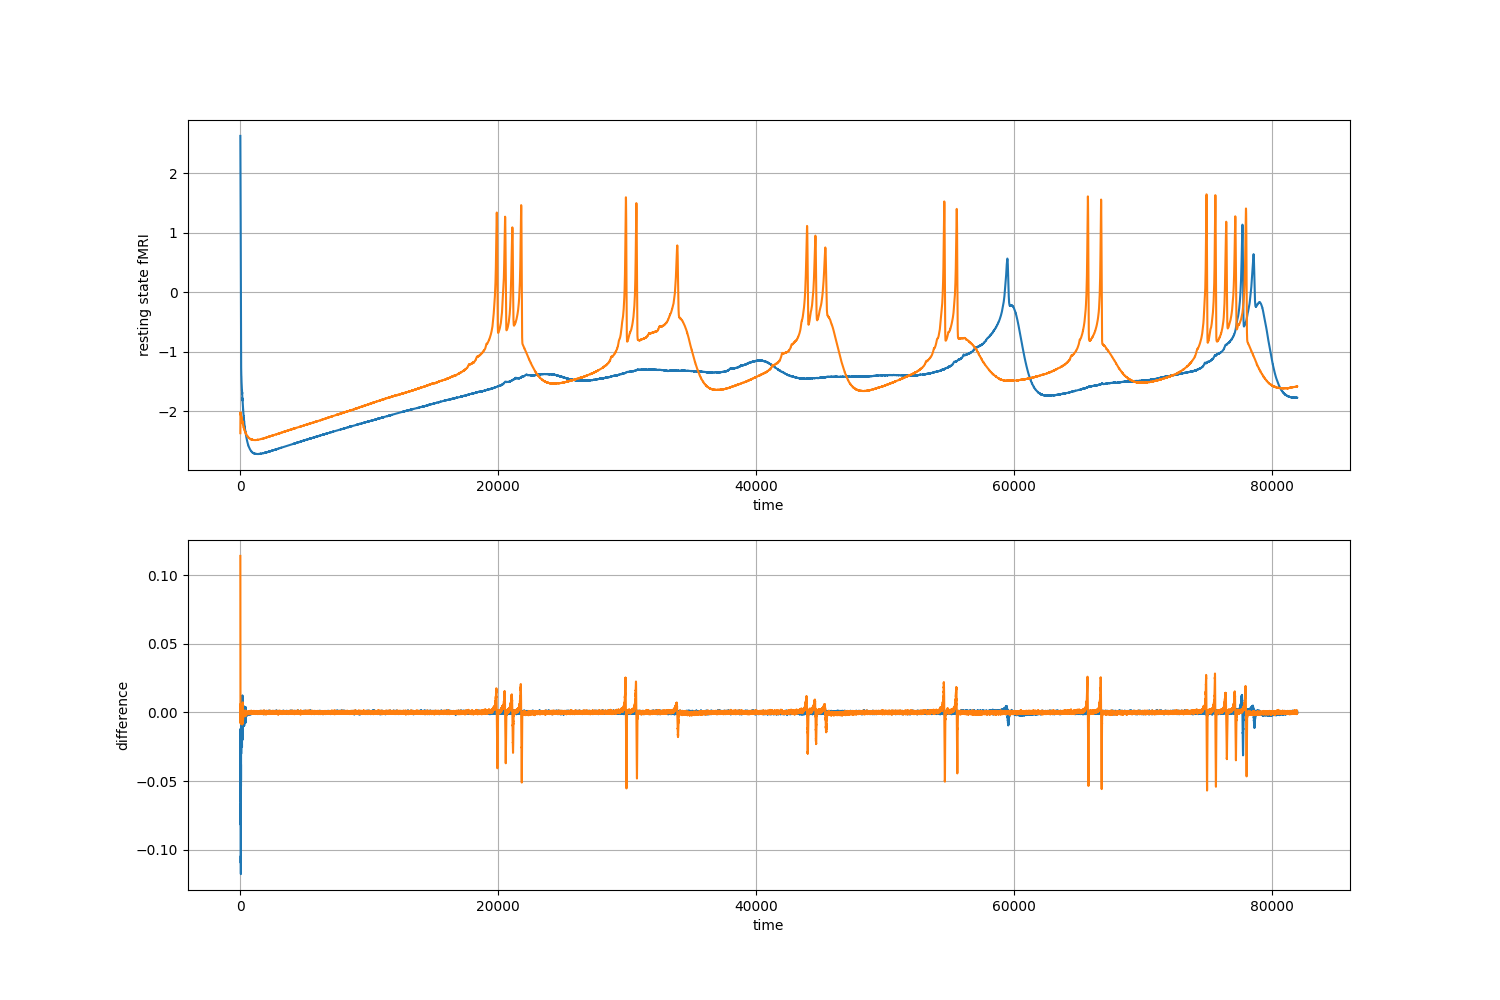

In [35]:
# %matplotlib widget
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(np.arange(len(pd_ts_0306A.iloc[:,roi])), pd_ts_0306A.iloc[:,roi])
plt.xlabel("time")
plt.ylabel("resting state fMRI")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.arange(len(pd_ts_diff.iloc[:,roi])), pd_ts_diff.iloc[:,roi])
plt.xlabel("time")
plt.ylabel("difference")
plt.grid(True)

Text(0, 0.5, 'amplitude')

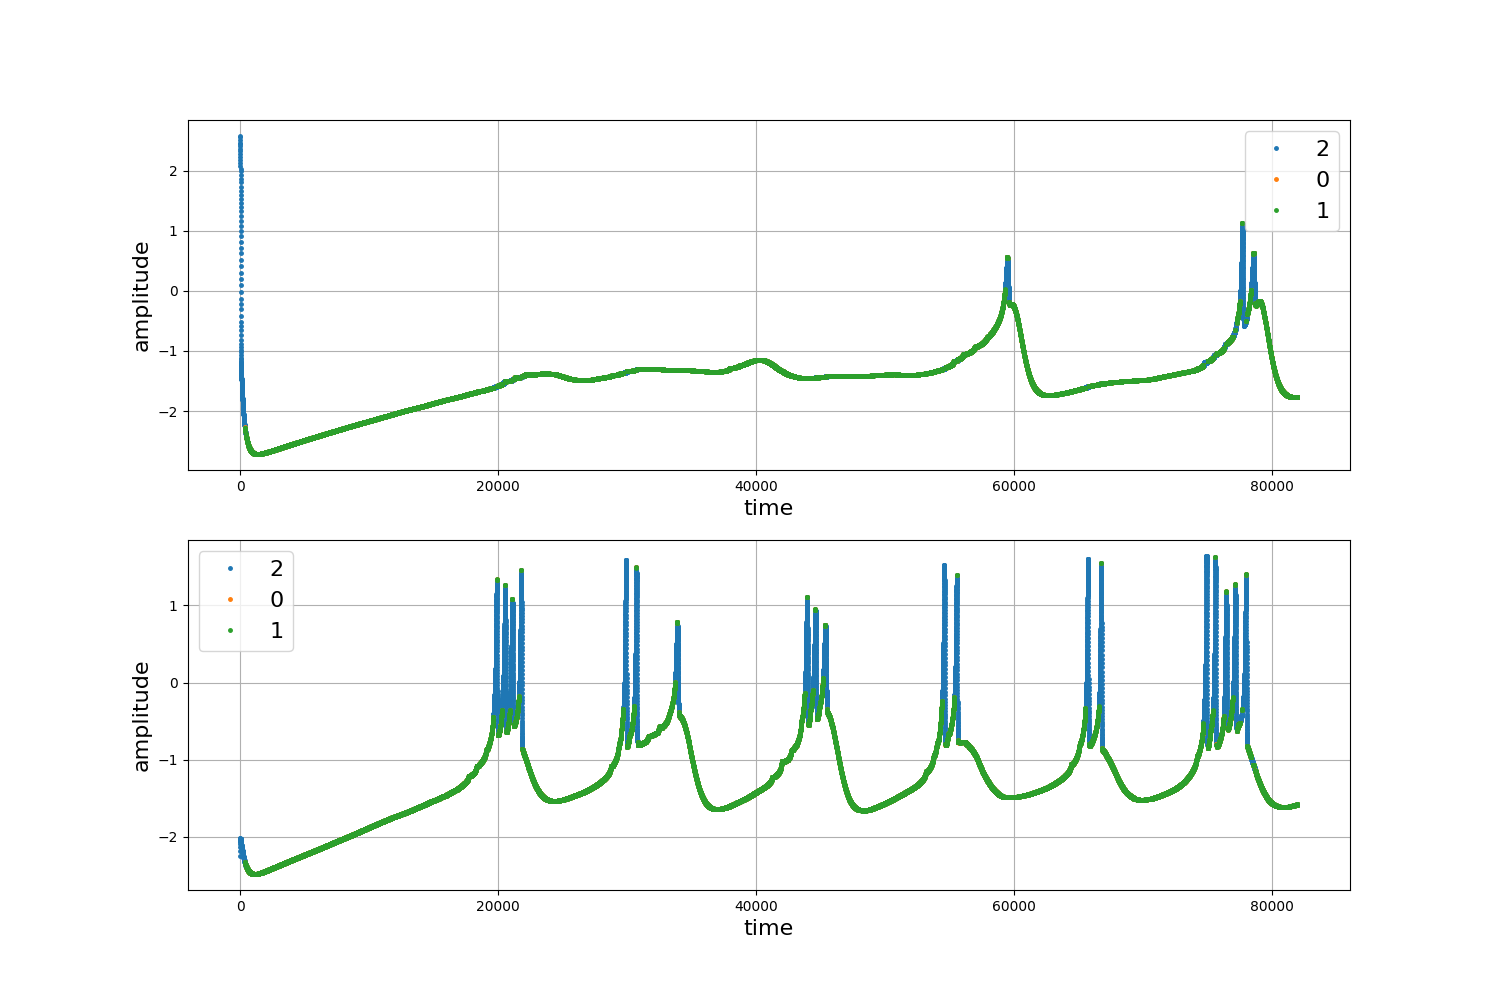

In [39]:
# %matplotlib widget
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = np.arange(len(X))[want]
    y = pd_ts_0306A_truc.iloc[want, roi[0]]
    plt.plot(x, y, '.', markersize=5)
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("time", fontsize=16)
plt.ylabel("amplitude", fontsize=16)

plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = np.arange(len(X))[want]
    y = pd_ts_0306A_truc.iloc[want, roi[1]]
    plt.plot(x, y, '.', markersize=5)
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("time", fontsize=16)
plt.ylabel("amplitude", fontsize=16)



# plt.subplot(2,1,2)
# for i in states:
#     want = (Z == i)
#     x = np.arange(len(X))[want]
#     y = pd_ts_diff.iloc[want, roi]
#     plt.plot(x, y, '.',markersize=5)
# plt.legend(states, fontsize=16)
# plt.grid(True)
# plt.xlabel("datetime", fontsize=16)
# plt.ylabel("amplitude changes", fontsize=16)
# plt.show()